In [2]:
import pandas as pd
from fastai.tabular import *
from fastai.callbacks import *

In [3]:
path = Path('../data')

In [4]:
df = pd.read_csv(path/'interim/02_classification_split_urls.csv', error_bad_lines=False, index_col=0)

In [5]:
df

,Primary Category,Secondary Category,Title,URL,scheme,netloc,url1,url2,url3,url4,url5,url6
0,Arts & Humanities,Architecture,68 Dean Street,http://www.sixty8.com/,http,"['www', 'sixty8', 'com']",www,sixty8,com,NaN,NaN,NaN
1,Arts & Humanities,Architecture,Abandoned Communities,http://www.abandonedcommunities.co.uk/,http,"['www', 'abandonedcommunities', 'co', 'uk']",www,abandonedcommunities,co,uk,NaN,NaN
2,Arts & Humanities,Architecture,Alexander Thomson Society,http://www.greekthomson.com/,http,"['www', 'greekthomson', 'com']",www,greekthomson,com,NaN,NaN,NaN
3,Arts & Humanities,Architecture,"Arab British Centre, The",http://www.arabbritishcentre.org.uk/,http,"['www', 'arabbritishcentre', 'org', 'uk']",www,arabbritishcentre,org,uk,NaN,NaN
4,Arts & Humanities,Architecture,Architectural Association School of Architecture,http://www.aaschool.ac.uk/,http,"['www', 'aaschool', 'ac', 'uk']",www,aaschool,ac,uk,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
26793,Travel & Tourism,Cornwall,West Briton and Cornwall Advertiser - transcri...,http://freepages.genealogy.rootsweb.ancestry.c...,http,"['freepages', 'genealogy', 'rootsweb', 'ancest...",freepages,genealogy,rootsweb,ancestry,com,NaN
26794,Travel & Tourism,Cornwall,West Cornwall Community Network,http://www.wccn.org.uk/,http,"['www', 'wccn', 'org', 'uk']",www,wccn,org,uk,NaN,NaN
26795,Travel & Tourism,Cornwall,West Penwith Resources,http://www.west-penwith.org.uk/,http,"['www', 'west-penwith', 'org', 'uk']",www,west-penwith,org,uk,NaN,NaN
26796,Travel & Tourism,Cornwall,Yeate Farm - the Granary self-catering accommo...,http://www.yeatefarm.co.uk/,http,"['www', 'yeatefarm', 'co', 'uk']",www,yeatefarm,co,uk,NaN,NaN


In [6]:
len(df.url3.unique())

279

In [7]:
df.url1.unique()

array(['www', 'architecturemps', 'news', 'projects', ..., 'devotedtotravel', 'wikitravel', 'walking',
       'specialolympicswales'], dtype=object)

In [8]:
sample = int(len(df)*0.3)
df_sample = df.sample(sample)
df_sample['is_valid'] = True
df['is_valid'] = False
dfs = [df, df_sample]
df = pd.concat(dfs)
df

,Primary Category,Secondary Category,Title,URL,scheme,netloc,url1,url2,url3,url4,url5,url6,is_valid
0,Arts & Humanities,Architecture,68 Dean Street,http://www.sixty8.com/,http,"['www', 'sixty8', 'com']",www,sixty8,com,NaN,NaN,NaN,False
1,Arts & Humanities,Architecture,Abandoned Communities,http://www.abandonedcommunities.co.uk/,http,"['www', 'abandonedcommunities', 'co', 'uk']",www,abandonedcommunities,co,uk,NaN,NaN,False
2,Arts & Humanities,Architecture,Alexander Thomson Society,http://www.greekthomson.com/,http,"['www', 'greekthomson', 'com']",www,greekthomson,com,NaN,NaN,NaN,False
3,Arts & Humanities,Architecture,"Arab British Centre, The",http://www.arabbritishcentre.org.uk/,http,"['www', 'arabbritishcentre', 'org', 'uk']",www,arabbritishcentre,org,uk,NaN,NaN,False
4,Arts & Humanities,Architecture,Architectural Association School of Architecture,http://www.aaschool.ac.uk/,http,"['www', 'aaschool', 'ac', 'uk']",www,aaschool,ac,uk,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3316,Arts & Humanities,Music,Poets and Players,http://www.poetsandplayers.co.uk/,http,"['www', 'poetsandplayers', 'co', 'uk']",www,poetsandplayers,co,uk,NaN,NaN,True
1828,Arts & Humanities,Languages,DC Blog,http://david-crystal.blogspot.com/,http,"['david-crystal', 'blogspot', 'com']",david-crystal,blogspot,com,NaN,NaN,NaN,True
13742,"Government, Law & Politics",European Parliament Elections 2009,International Save the Children Alliance: EURO...,http://www.savethechildren.net/alliance/europe...,http,"['www', 'savethechildren', 'net']",www,savethechildren,net,NaN,NaN,NaN,True
20592,Science & Technology,Cambridge Network,Oloco,http://www.oloco.co/,http,"['www', 'oloco', 'co']",www,oloco,co,NaN,NaN,NaN,True


In [8]:
df.to_csv(path/'processed/03_classification_valid_train.csv')

## Drop 

In [9]:
df = df.drop(['URL','Secondary Category', 'netloc', 'Title','url2'],axis=1)

In [10]:
df

,Primary Category,scheme,url1,url3,url4,url5,url6,is_valid
0,Arts & Humanities,http,www,com,NaN,NaN,NaN,False
1,Arts & Humanities,http,www,co,uk,NaN,NaN,False
2,Arts & Humanities,http,www,com,NaN,NaN,NaN,False
3,Arts & Humanities,http,www,org,uk,NaN,NaN,False
4,Arts & Humanities,http,www,ac,uk,NaN,NaN,False
...,...,...,...,...,...,...,...,...
3316,Arts & Humanities,http,www,co,uk,NaN,NaN,True
1828,Arts & Humanities,http,david-crystal,com,NaN,NaN,NaN,True
13742,"Government, Law & Politics",http,www,net,NaN,NaN,NaN,True
20592,Science & Technology,http,www,co,NaN,NaN,NaN,True


In [11]:
df = df.reset_index(drop=True)

In [12]:
procs = [Categorify, FillMissing, Normalize]

In [13]:
dep_var = 'Primary Category'
cat_names = ['scheme', 
            'url1','url3','url4','url5','url6']



In [14]:
data_tab = (TabularList.from_df(df,cat_names=cat_names, procs=procs)
            .split_from_df('is_valid')
            .label_from_df('Primary Category')
            .databunch(bs=32))

In [15]:
data_tab.show_batch()

scheme,url1,url3,url4,url5,url6,target
http,www,org,uk,#na#,#na#,"Government, Law & Politics"
http,www,gov,uk,#na#,#na#,"Crime, Criminology, Police and Prisons"
http,ssy,uk,#na#,#na#,#na#,"Government, Law & Politics"
http,classonline,uk,#na#,#na#,#na#,Society & Culture
http,www,com,#na#,#na#,#na#,"Business, Economy & Industry"


In [16]:
data_tab.c

24

In [17]:
def calcHiddenLayer(data, alpha, numHiddenLayers):
    tempData = data.train_ds
    i, o = len(tempData.x.classes), len(tempData.y.classes)
    io = i+o
    return [(len(data.train_ds)//(alpha*(io)))//numHiddenLayers]*numHiddenLayers

In [18]:
calcHiddenLayer(data_tab,2,1)

[446]

In [19]:
loss = LabelSmoothingCrossEntropy()

In [22]:
learn_tab = tabular_learner(data_tab,loss_func=loss, layers=[446], ps=[0.5], emb_drop=0.05, metrics=[accuracy])

learn_tab.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


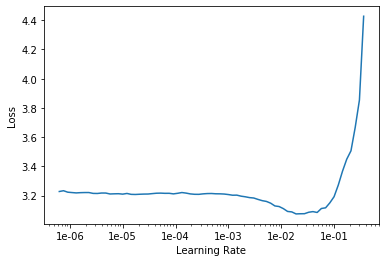

In [23]:
learn_tab.recorder.plot()

In [ ]:
learn_tab.fit_one_cycle(30,max_lr=1e-02,
                        callbacks=[SaveModelCallback(learn_tab, every='improvement', monitor='accuracy', name='best')])

epoch,train_loss,valid_loss,accuracy,time


In [23]:
learn_tab.load('best')

Learner(data=TabularDataBunch;

Train: LabelList (26798 items)
x: TabularList
scheme http; url1 www; url3 com; url4 #na#; url5 #na#; url6 #na#; ,scheme http; url1 www; url3 co; url4 uk; url5 #na#; url6 #na#; ,scheme http; url1 www; url3 com; url4 #na#; url5 #na#; url6 #na#; ,scheme http; url1 www; url3 org; url4 uk; url5 #na#; url6 #na#; ,scheme http; url1 www; url3 ac; url4 uk; url5 #na#; url6 #na#; 
y: CategoryList
Arts & Humanities,Arts & Humanities,Arts & Humanities,Arts & Humanities,Arts & Humanities
Path: .;

Valid: LabelList (8039 items)
x: TabularList
scheme http; url1 www; url3 co; url4 uk; url5 #na#; url6 #na#; ,scheme http; url1 www; url3 org; url4 uk; url5 #na#; url6 #na#; ,scheme http; url1 www; url3 com; url4 #na#; url5 #na#; url6 #na#; ,scheme http; url1 www; url3 org; url4 #na#; url5 #na#; url6 #na#; ,scheme http; url1 www; url3 co; url4 uk; url5 #na#; url6 #na#; 
y: CategoryList
Medicine & Health,Religion,Business, Economy & Industry,Society & Culture,Education & Resea

NameError: name 'learn_tab' is not defined